# MNIST Dynamic Filter Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

In [1]:
%%bash
tf_version='2.0.0rc0'
if pip freeze | grep -q "^tensorflow==${tf_version}$"; then
    echo "tensorflow==${tf_version} is already installed. No actions are required."
else
    echo "Installing tensorflow==${tf_version}. Don't forget to restart the runtime."
    pip install tensorflow==${tf_version}
fi

tensorflow==2.0.0rc0 is already installed. No actions are required.


####[MDF-01]
Import modules and set random seeds.

In [0]:
import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190222)
tf.random.set_seed(20190222)

####[MDF-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11493376/11490434 [==============================] - 0s 0us/step


####[MDF-03]
Define a CNN model with a single convolutional filter layer.

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3212288   
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 3,222,954
Trainable params: 3,222,954
Non-trainable params: 0
______________________________________________

####[MDF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MDF-05]
Train the model. It achieves the 98.9% accuracy.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.1711 - acc: 0.9494 - val_loss: 0.0606 - val_acc: 0.9805
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0513 - acc: 0.9843 - val_loss: 0.0392 - val_acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0320 - acc: 0.9897 - val_loss: 0.0438 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0335 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0376 - val_acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0118 - acc: 0.9963 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0084 - acc: 0.9973 - val_loss: 0.

####[MDF-06]
Plot charts for the accuracy and loss values.

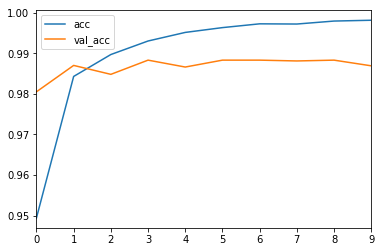

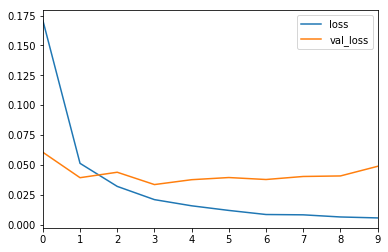

In [7]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[MDF-07]
Mount your Google Drive on `/content/gdrive`.

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDF-08]
Export the trained model as a file `MNIST_single.hd5` on your Google Drive.

In [13]:
model.save('/content/gdrive/My Drive/MNIST_single.hd5', save_format="h5")
!ls -lh '/content/gdrive/My Drive/MNIST_single.hd5'

-rw------- 1 root root 37M Aug 26 11:11 '/content/gdrive/My Drive/MNIST_single.hd5'
